# Access Sample SWOT Oceanography Data in the Cloud

<p>This notebook is based on a tutorial given at the 2022 SWOT OCEAN Cloud Workshop</p>

> The original source for the previous version of this document is [https://github.com/podaac/2022-SWOT-Ocean-Cloud-Workshop/blob/main/tutorials/01_Direct_Access_SWOT_sim.ipynb](https://github.com/podaac/2022-SWOT-Ocean-Cloud-Workshop/blob/main/tutorials/01_Direct_Access_SWOT_sim.ipynb)

# 01. Direct cloud data access

## Getting Started
In this notebook will show direct access of PO.DAAC archived products in the Earthdata Cloud in AWS Simple Storage Service (S3). In this demo, we will showcase the usage of **SWOT Simulated Level-2 KaRIn SSH from GLORYS for Science Version 1**. More information on the datasets can be found at https://podaac.jpl.nasa.gov/dataset/SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1.

We will access the data from inside the AWS cloud (us-west-2 region, specifically) and load a time series made of multiple netCDF files into a single xarray dataset.

In the future, if you want to use this notebook as a reference, please note that we are not doing collection discovery here - we assume the collection of interest has been determined. 

### Requirements

This can run in the Small openscapes instance, that is, it only needs 8GB of memory and ~2 CPU.

If you want to run this in your own AWS account, you can use a *t2.large* instance, which also has 2 CPU and 8GB memory. It's improtant to note that all instances using direct S3 access to PO.DAAC or Earthdata data are required to run in us-west-2, or the Oregon region.

This instance will cost approximately $0.0832 per hour. The entire demo can run in considerably less time.

### Imports 

Most of these imports are from the Python standard library. However, you will need to install these packages into your Python 3 environment if you have not already done so:

```
boto3
s3fs
xarray
matplotlib
cartopy
earthaccess
```

## Learning Objectives
* import needed libraries
* authenticate for `earthaccess` Python Library using your NASA Earthdata Login
* access DAAC data directly from the in-region S3 bucket without moving or downloading any files to your local (cloud) workspace
* access DAAC data by downloading directly into your cloud workspace from S3 within US-west 2 and operating on those files.
* plot the first time step in the data

Note: no files are being donwloaded off the cloud, rather, we are working with the data in the AWS cloud.

In [1]:
import boto3
import json
import xarray as xr
import s3fs
import os
import requests
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
from os import path
import earthaccess
from earthaccess import Auth, DataCollections, DataGranules, Store
%matplotlib inline

# Access without Downloads

### Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up. We use earthaccess to authenticate your login credentials below.

In [ ]:
auth = earthaccess.login(strategy="interactive", persist=True)

### Access Files without any Downloads to your running instance

Let’s try accessing the data from S3 directly through xarray (Xarray is a python package for working with labeled multi-dimensional (a.k.a. N-dimensional, ND) arrays). Here, we use the `earthaccess` Python library to search for and then load the data directly into xarray without downloading any files.

In [3]:
#retrieves granule from the day we want
karin_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1', temporal = ("2014-04-12 12:00:00", "2014-04-12 19:43:00"))

Granules found: 9


In [5]:
#opens granules and load into xarray dataset
ds = xr.open_mfdataset(earthaccess.open(karin_results), combine='nested', concat_dim="num_lines", decode_times=False, engine='h5netcdf')
ds

 Opening 9 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/9 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/9 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/9 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:                                (num_lines: 88796, num_pixels: 71,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/91)
    time                                   (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    time_tai                               (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ssh_karin_2                            (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ...                                     ...
    simulated_error_baseline_dilation      (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_timing                 (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_roll                   (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_phase                  (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_orbital                (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_karin                  (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-10 09:54:55Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       131.81928697472432
    right_last_latitude:        77.03254381435897
    wavelength:                 0.008385803020979
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  6378137.0
    ellipsoid_flattening:       0.003352810664781205

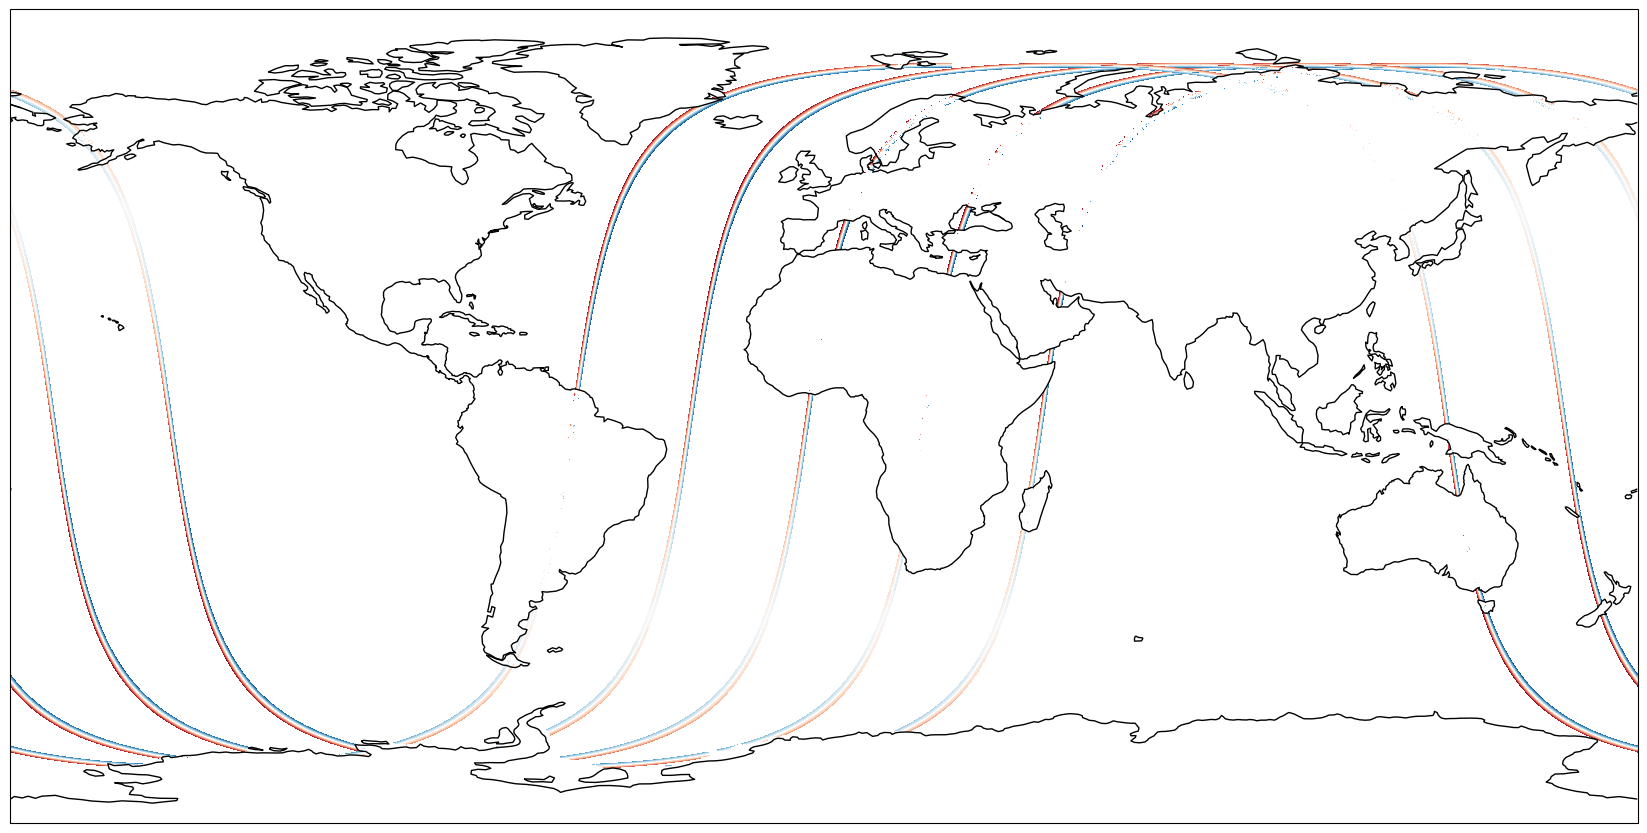

In [6]:
plt.figure(figsize=(21, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.ssha_karin.plot.pcolormesh(
 ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=False
)
ax.coastlines()

# Traditional Access

## Get a temporary AWS Access Key based on your Earthdata Login user ID

We can also do that same plot by ‘downloading’ the data to our cloud instance (i.e. disk) first. Direct S3 access is achieved by passing NASA supplied temporary credentials to AWS so we can interact with S3 objects (i.e. data) from applicable Earthdata Cloud buckets (storage space). For now, each NASA DAAC has different AWS credentials endpoints. Since this data is from the PO.DAAC and hosted in the cloud, we will be passing those two end points through to start an s3fs session.

In [ ]:
#authenticate with your earthdata log in
auth = earthaccess.login(strategy="interactive", persist=True)

In [8]:
s3fs = earthaccess.get_s3fs_session(daac='PODAAC', provider='POCLOUD')

## Now that we have cloud access...

It's time to find our data! Below we are using the same search using `earthaccess`.

The files we are looking at are about 11-13 MB each. So the 10 we're looking to access are about ~100 MB total.

In [9]:
#retrieves granule from the day we want
karin_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1', temporal = ("2014-04-12 12:00:00", "2014-04-12 19:43:00"))

Granules found: 9


## Get files from S3 and store them on your running cloud instance

Here we will leverage the speed of transfering data within the cloud to our running instance (this notebook!). We will download 10 files into the 'DEMO_FILES' directory.

In [10]:
#'download' files onto local instance using earthaccess
Store(auth).get(karin_results, "DEMO_FILES/", provider='POCLOUD')

 Getting 9 granules, approx download size: 0.0 GB


SUBMITTING | :   0%|          | 0/9 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/9 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/9 [00:00<?, ?it/s]

['SWOT_L2_LR_SSH_Expert_001_001_20140412T120000_20140412T125126_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_002_20140412T125126_20140412T134253_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_003_20140412T134253_20140412T143420_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_004_20140412T143420_20140412T152546_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_005_20140412T152547_20140412T161713_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_006_20140412T161714_20140412T170840_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_007_20140412T170840_20140412T180007_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_008_20140412T180008_20140412T185134_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_001_009_20140412T185134_20140412T194301_DG10_01.nc']

In [11]:
#load 'downloaded' data into dataset to be used for plotting
ds = xr.open_mfdataset("DEMO_FILES/SWOT_L2_LR_SSH_Expert_001_0*.nc", combine='nested', concat_dim="num_lines", decode_times=False)
ds

<xarray.Dataset>
Dimensions:                                (num_lines: 88796, num_pixels: 71,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/91)
    time                                   (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    time_tai                               (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ssh_karin_2                            (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    ...                                     ...
    simulated_error_baseline_dilation      (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_timing                 (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_roll                   (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_phase                  (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_orbital                (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
    simulated_error_karin                  (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 71), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-10 09:54:55Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       131.81928697472432
    right_last_latitude:        77.03254381435897
    wavelength:                 0.008385803020979
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  6378137.0
    ellipsoid_flattening:       0.003352810664781205

Now let's plot a variable (`ssh_karin`) from these 10 files in a chosen projection.

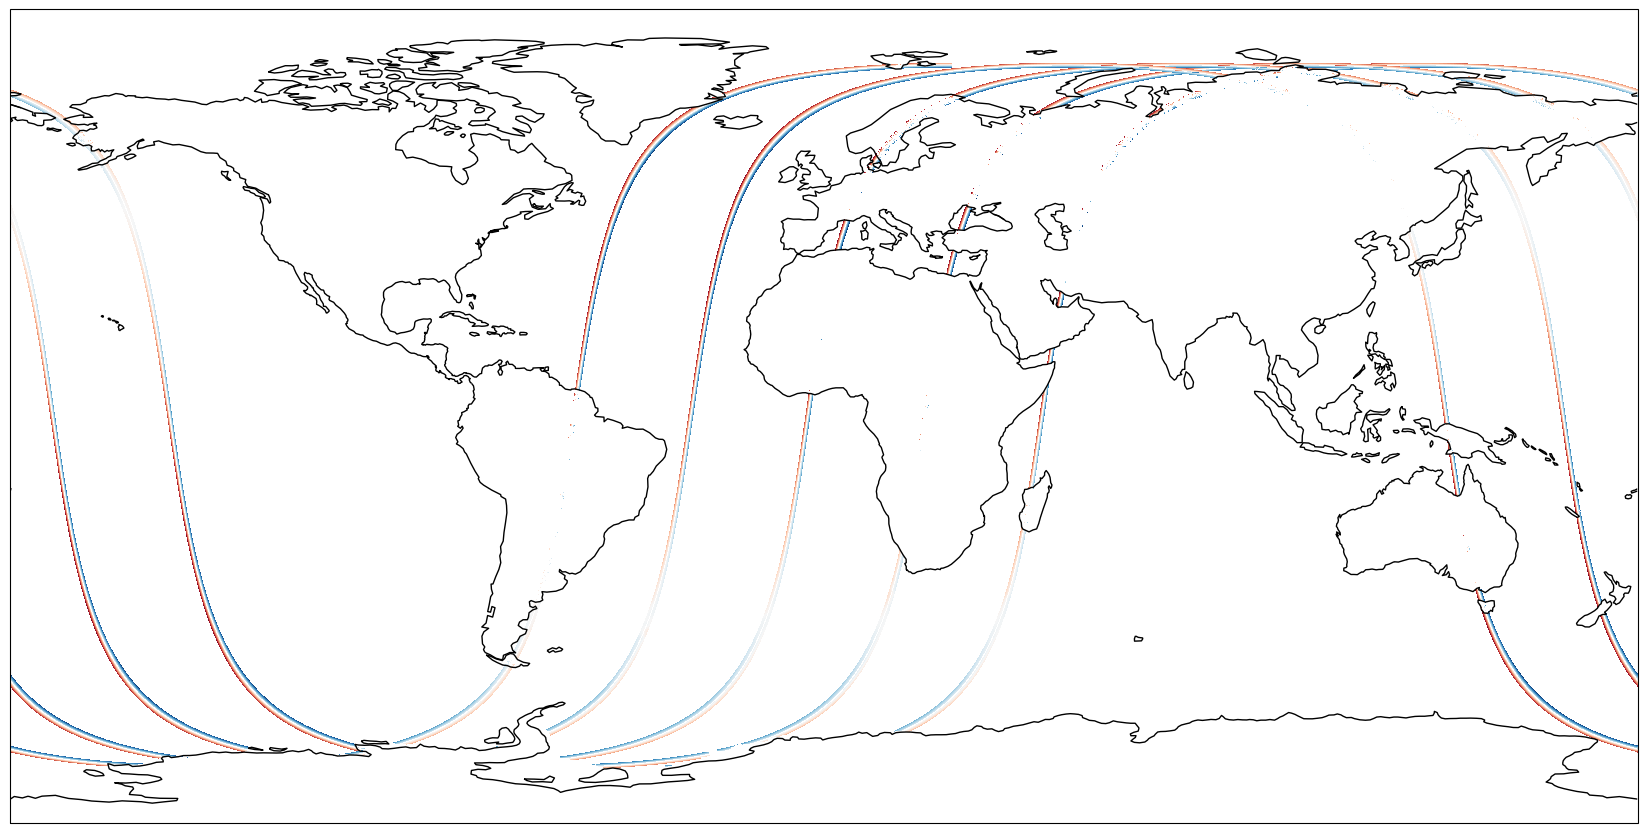

In [12]:
plt.figure(figsize=(21, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([150, 180, 45, 90])
ax.set_global()
ds.ssh_karin.plot.pcolormesh(
 ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=False
)
ax.coastlines()

#ds.ssh_karin.plot()


## A final word...

Accessing data completely from S3 and in memory are affected by various things.

1. The format of the data - archive formats like NetCDF, GEOTIFF, HDF vs cloud optimized data structures (Zarr, kerchunk, COG). Cloud formats are made for accessing only the pieces of data of interest needed at the time of the request (e.g. a subset, timestep, etc).
2. The internal structure of the data. Tools like xarray make a lot of assumptions about how to open and read a file. Sometimes the internals don't fit the xarray 'mould' and we need to continue to work with data providers and software providers to make these two sides work together. Level 2 data (non-gridded), specifically, suffers from some of the assumptions made.